<a href="https://colab.research.google.com/github/ayush9h/PyTorch-DeepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from imageio import imread

import matplotlib.pyplot as plt

In [3]:
bathtub = imread('https://ca-times.brightspotcdn.com/dims4/default/72eeb55/2147483647/strip/true/crop/600x315+0+9/resize/1200x630!/quality/75/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2F79%2F54%2Fc3197854e83350568232f3b56952%2Fla-xpm-photo-2012-sep-28-la-et-cm-stedelijk-expansion-20120929')

/tmp/ipython-input-948890695.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bathtub = imread('https://ca-times.brightspotcdn.com/dims4/default/72eeb55/2147483647/strip/true/crop/600x315+0+9/resize/1200x630!/quality/75/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2F79%2F54%2Fc3197854e83350568232f3b56952%2Fla-xpm-photo-2012-sep-28-la-et-cm-stedelijk-expansion-20120929')


In [4]:
print(bathtub.shape)

(630, 1200, 3)


In [5]:
import numpy as np

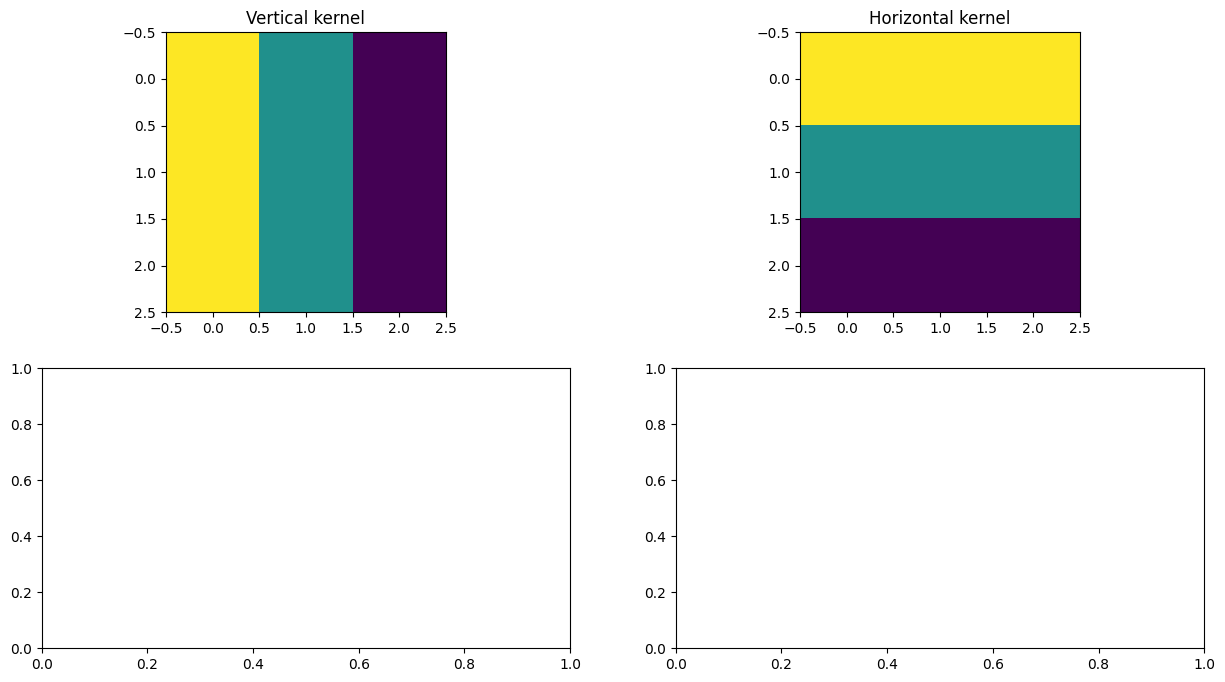

In [16]:
VK = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
HK = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

fig,ax = plt.subplots(2,2,figsize=(15,8))
ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')

plt.show()

In [11]:
import torch
import torch.nn.functional as F

VK_t = torch.tensor(VK).view(1,1,3,3).double()
HK_t = torch.tensor(HK).view(1,1,3,3).double()

bathtub = np.mean(bathtub,axis=2)
bathtub = bathtub/np.max(bathtub)


print(bathtub.shape)

(630, 1200)


In [12]:
bathtub_t = torch.tensor(bathtub).view(1,1,bathtub.shape[0],bathtub.shape[1])

In [19]:
print(HK_t.shape)

torch.Size([1, 1, 3, 3])


In [18]:
bathtub_t.shape

torch.Size([1, 1, 630, 1200])

In [13]:
C = F.conv2d(bathtub_t,VK_t)
print(C.shape)

torch.Size([1, 1, 628, 1198])


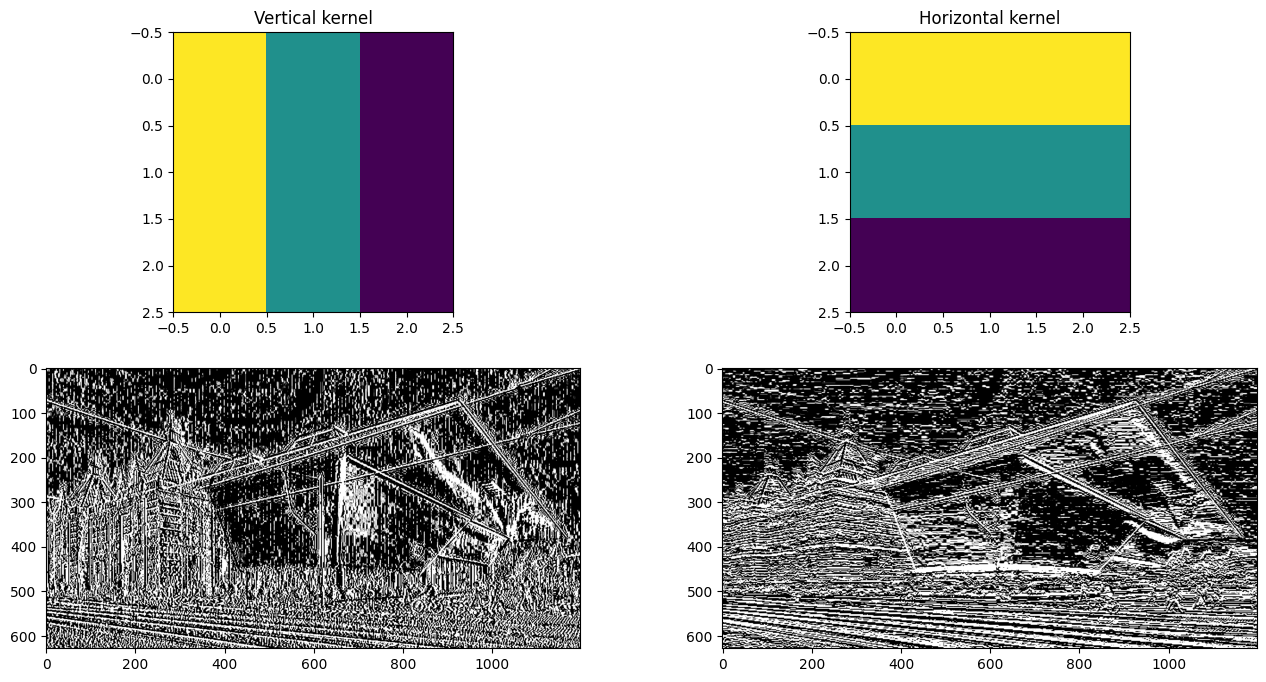

In [14]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')


convres = F.conv2d(bathtub_t, VK_t)
img = torch.squeeze(convres.detach())
ax[1,0].imshow(img,cmap='gray',vmin=0,vmax=.01)

convres = F.conv2d(bathtub_t,HK_t)
img = torch.squeeze(convres.detach())
ax[1,1].imshow(img,cmap='gray',vmin=0,vmax=.01)

In [20]:
import numpy as np
import torch
import torch.nn as nn

In [26]:
inChans = 1
imsize = [256,256]
outChans = 1

krnSize = 7
stride = (1,3)
padding = 1
c = nn.Conv2d(inChans,outChans, krnSize,stride, padding)
img = torch.rand(1,inChans,*imsize)

resimg = c(img)
print(resimg.shape)

# Removing the 1's
empsize = torch.squeeze(resimg).shape
print(empsize)

expectSize = np.array([outChans,0,0],dtype=int)
expectSize[1] = np.floor( (imsize[0]+2*padding-krnSize)/stride[0] ) + 1
expectSize[2] = np.floor( (imsize[1]+2*padding-krnSize)/stride[1] ) + 1

print(f"Expected:{expectSize}")
print(f"Empirical:{list(empsize)}")

torch.Size([1, 1, 252, 84])
torch.Size([252, 84])
Expected:[  1 252  84]
Empirical:[252, 84]
